<a href="https://colab.research.google.com/github/ahmetsenormanci/MLbasics/blob/main/MLbasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
import os
import tarfile
import urllib.request
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [233]:
fetch_housing_data()

In [234]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [235]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [236]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [237]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [238]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving image.. attribute_histogram_plots


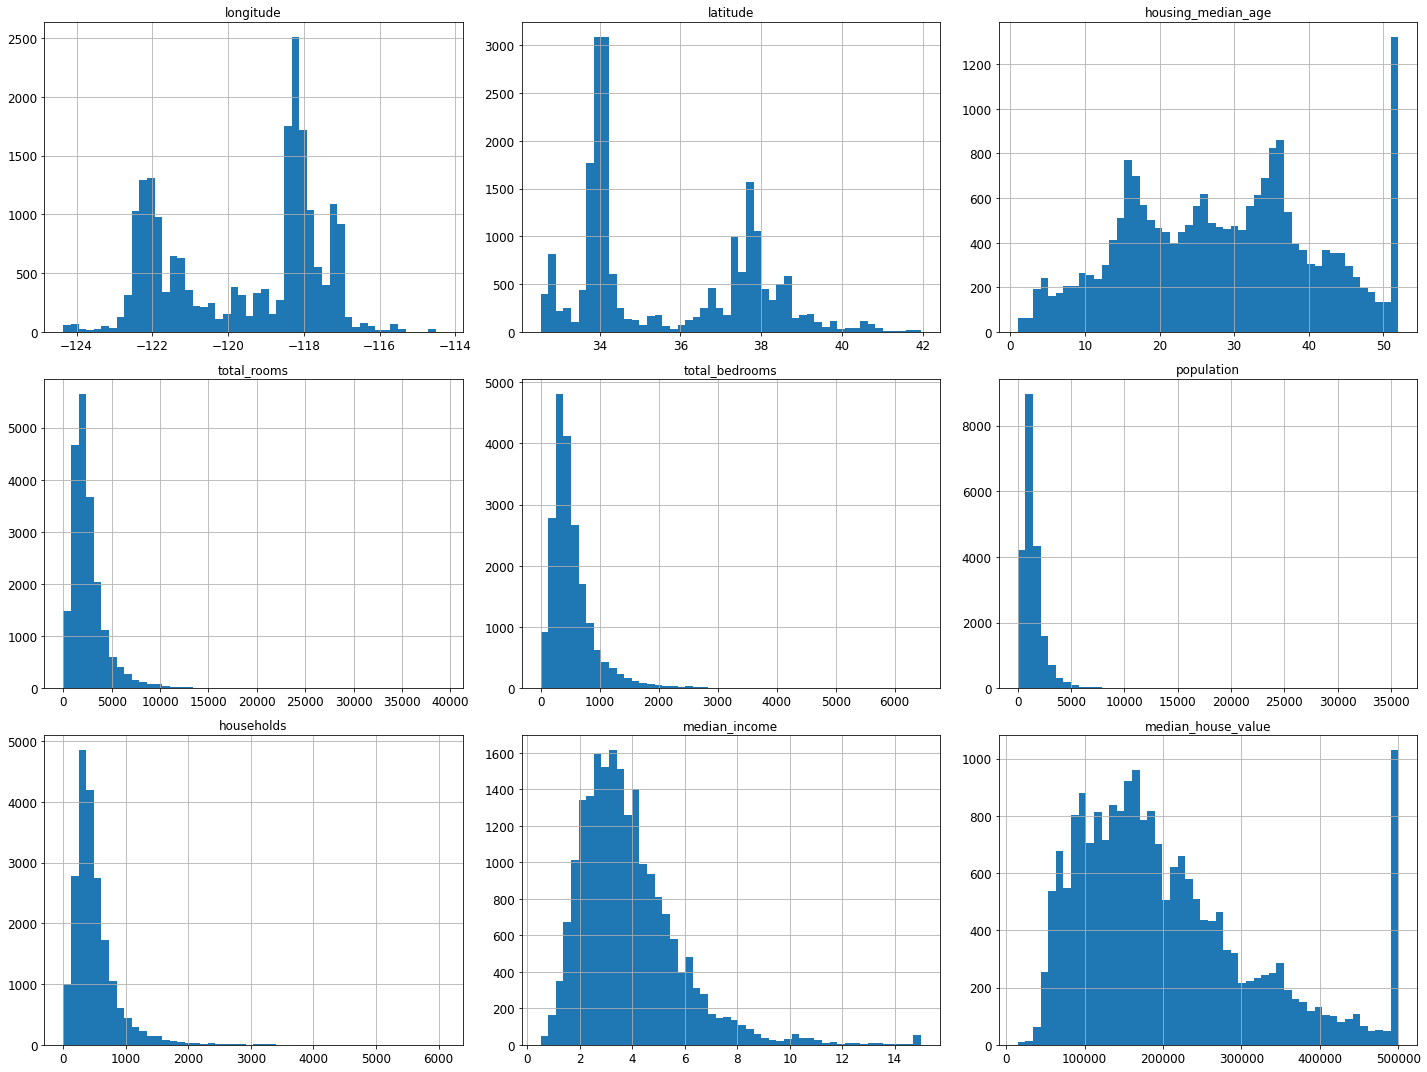

In [239]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [240]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [241]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [242]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [243]:
len(test_set)

4128

In [244]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [245]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [246]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [247]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [248]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [249]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [250]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [251]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


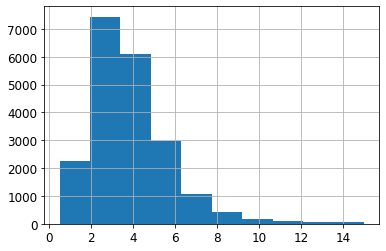

In [252]:
housing["median_income"].hist()

In [253]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [254]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [255]:
housing_with_id["id"] = housing["longitude"] = 1000 + housing["latitude"]
train_set,test_set = split_train_test_by_id(housing_with_id, 0.2,"id")

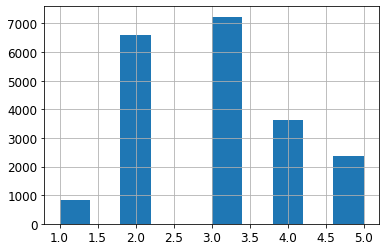

In [256]:
housing["income_cat"].hist()

In [257]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [258]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [259]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [260]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [261]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [262]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [263]:
#Let's visualize our data

In [264]:
housing = strat_train_set.copy()

Saving image.. bad_visualization_plot


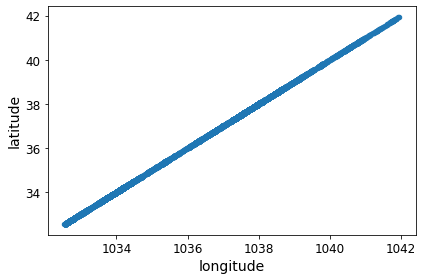

In [265]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

In [266]:
#Not the best but it's a thing

Saving image.. better_visualization_plot


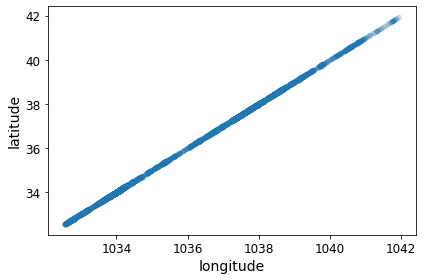

In [267]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving image.. housing_prices_scatterplot


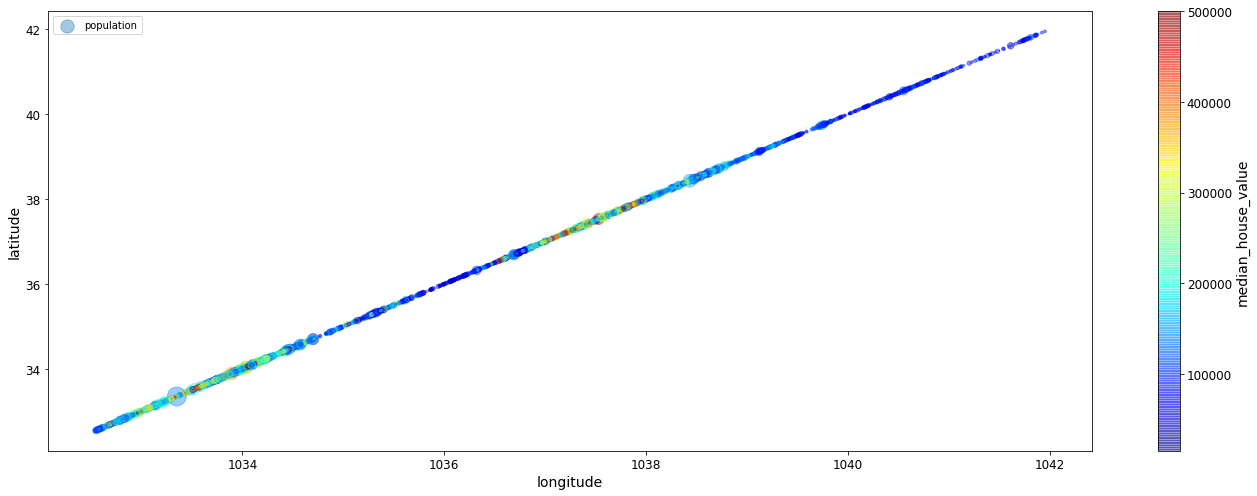

In [268]:
housing.plot(kind ="scatter", x="longitude", y="latitude", alpha = 0.4,
             s=housing["population"]/100, label = "population", figsize=(19,7),
             c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [269]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7efd6dd131d0>)

Saving image.. california_housing_prices_plot


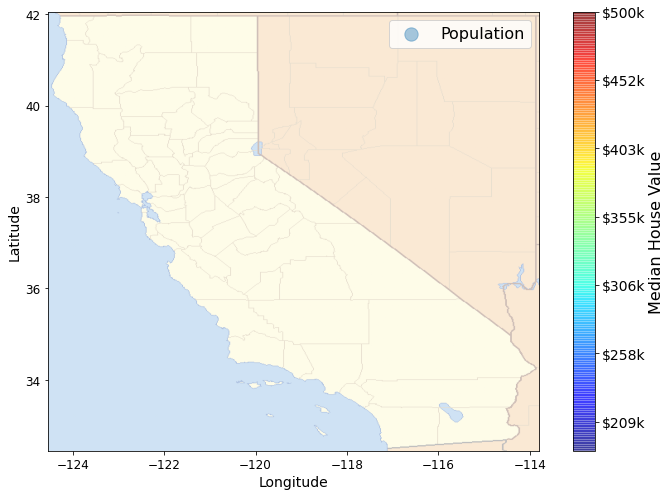

In [270]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [271]:
corr_matrix= housing.corr()

In [272]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.142724
latitude             -0.142724
Name: median_house_value, dtype: float64

Saving image.. scatter_matrix_plot


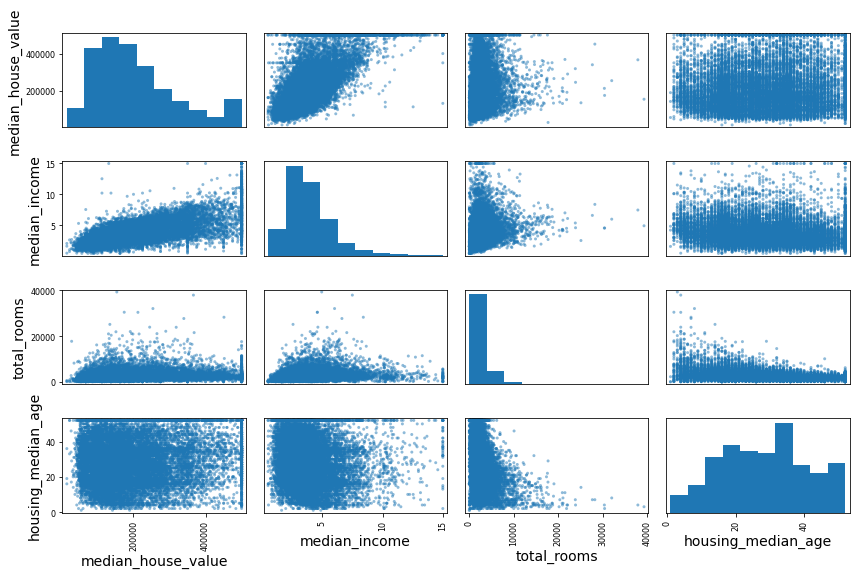

In [273]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value", "median_income","total_rooms",
            "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
save_fig("scatter_matrix_plot")

Saving image.. income_vs_house_value_scatterplot


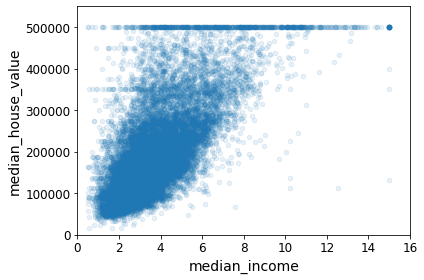

In [274]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

In [275]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [276]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.142724
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

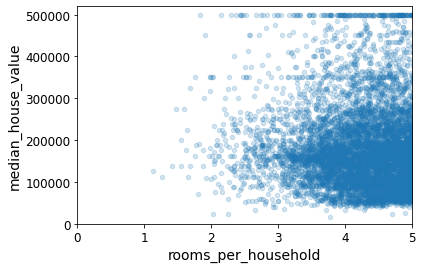

In [277]:
"""The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are."""

housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

At this point we have to decide what to do with cleaning operations, are we going to get rid of it, or are we gonna set some values to na's

In [278]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [279]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,1034.07,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,1034.01,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,1037.35,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,1034.05,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,1038.48,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [280]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [281]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,1034.07,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,1034.01,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,1037.35,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,1034.05,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,1038.48,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [282]:
median=housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

In [283]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,1034.07,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,1034.01,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,1037.35,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,1034.05,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,1038.48,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [284]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")


At htis point we have to remove the text attribute because median can only be calculated on numeric

In [285]:
housing_num = housing.drop("ocean_proximity",axis=1)
#housing_num=housing.select_dtypes(include=[np.number])

In [286]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [287]:
imputer.statistics_

array([1034.26  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [288]:
housing_num.median().values

array([1034.26  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [289]:
X=imputer.transform(housing_num)

In [290]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,
                          index=housing.index)

In [291]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,1034.07,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,1034.01,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,1037.35,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,1034.05,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,1038.48,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [292]:
imputer.strategy

'median'

In [293]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [294]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,1037.29,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,1037.05,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,1032.77,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,1036.31,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,1034.23,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [295]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [296]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [297]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [298]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot= cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
#by default one hot encoder returns a sparse arrat but we can convert it to a default array

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [299]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [300]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Let's create a custom transformer to add extra attributes

In [301]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [302]:
col_names= "total_rooms","total_bedrooms","population","households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
                                                       housing.columns.get_loc(c) for c in col_names
]

In [303]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,1037.29,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,1037.05,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,1032.77,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,1036.31,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,1034.23,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


We have seperately deal with categorical and numerical attributes, now let's create a pipeline for preprocessing

In [304]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [305]:
housing_num_tr

array([[ 0.77194962,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [ 0.6596948 ,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [-1.34218285, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [-0.72478134, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [-0.85106801, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [ 0.99645926,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [306]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [307]:
housing_prepared.shape

(16512, 16)

In [308]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [309]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [310]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [311]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[ 0.77194962,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6596948 ,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.34218285, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.72478134, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [-0.85106801, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99645926,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [312]:
np.allclose(housing_prepared, old_housing_prepared)

True

Let's select and train a model

In [313]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [314]:
some_data=housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:" ,lin_reg.predict(some_data_prepared))

Predictions: [197365.15625 299045.15625 218173.15625  52045.15625 187709.15625]


In [315]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69827.43796876358

In [316]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(housing_labels,housing_predictions)
lin_mae

50107.106106543724

In [317]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [318]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse= mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Let's tune our models

In [319]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [320]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [75367.89207997 73824.39348735 76919.23422484 76381.29030372
 75937.2667204  79947.06775545 74292.06170256 73807.5668977
 80013.10049412 77965.69700627]
Mean: 76445.55706723614
Standard deviation: 2177.4761247240467


In [321]:
lin_scores= cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68180.57053061 67942.66874693 70750.08651123 76174.60629048
 69153.1764804  72516.33286333 66288.47584279 69230.53900701
 72732.69822866 69187.29094476]
Mean: 70215.64454461918
Standard deviation: 2744.284259302108


In [322]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [323]:
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse= mean_squared_error(housing_labels, housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

20236.674737137822

In [324]:
from sklearn.model_selection import cross_val_score
forest_scores= cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [53686.74212139 51071.84519182 54167.51979662 56560.05830184
 54862.26748713 57393.85318608 52677.93774429 51933.92818034
 57631.19313585 54839.13250698]
Mean: 54482.447765233424
Standard deviation: 2123.5483748334123


In [326]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     70215.644545
std       2892.729602
min      66288.475843
25%      68423.722018
50%      69208.914976
75%      72074.771275
max      76174.606290
dtype: float64

In [327]:
from sklearn.svm import SVR
svm_reg= SVR(kernel="linear")
svm_reg.fit(housing_prepared,housing_labels)
housing_predictions= svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111153.07687394094

Let's tune our model

In [328]:
from sklearn.model_selection import GridSearchCV
param_grid = [
              {"n_estimators": [ 3,10,30],"max_features":[2,4,6,8]},
              {"bootstrap":[False], "n_estimators":[3,10], "max_features":[2,3,4]},

]
forest_reg=RandomForestRegressor(random_state=42)

grid_search=GridSearchCV(forest_reg, param_grid, cv=5,
                         scoring="neg_mean_squared_error",
                         return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [329]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [330]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [331]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

67911.38016816886 {'max_features': 2, 'n_estimators': 3}
59092.85229027272 {'max_features': 2, 'n_estimators': 10}
56112.66072661909 {'max_features': 2, 'n_estimators': 30}
63864.07217140354 {'max_features': 4, 'n_estimators': 3}
56596.30692429547 {'max_features': 4, 'n_estimators': 10}
54301.64256195408 {'max_features': 4, 'n_estimators': 30}
62393.70530843037 {'max_features': 6, 'n_estimators': 3}
55931.71361570398 {'max_features': 6, 'n_estimators': 10}
53818.16458418862 {'max_features': 6, 'n_estimators': 30}
63177.28835639294 {'max_features': 8, 'n_estimators': 3}
56287.47880957734 {'max_features': 8, 'n_estimators': 10}
54021.223383140925 {'max_features': 8, 'n_estimators': 30}
65260.49804351446 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
57699.59948733347 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
63475.35867325466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
56871.24651544431 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [332]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.077696,0.002245,0.007113,0.002420,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.499818e+09,-4.848031e+09,-4.587477e+09,-4.629505e+09,-4.494946e+09,-4.611956e+09,1.287670e+08,18,-1.208131e+09,-1.187863e+09,-1.285537e+09,-1.273896e+09,-1.211490e+09,-1.233383e+09,3.885993e+07
1,0.247097,0.010750,0.013764,0.001538,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.428834e+09,-3.570492e+09,-3.523403e+09,-3.436306e+09,-3.500791e+09,-3.491965e+09,5.350895e+07,11,-6.579107e+08,-6.246991e+08,-6.496373e+08,-6.699692e+08,-6.405365e+08,-6.485506e+08,1.536665e+07
2,0.764181,0.027065,0.040577,0.003469,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-3.010685e+09,-3.267475e+09,-3.269325e+09,-2.942148e+09,-3.253519e+09,-3.148631e+09,1.423776e+08,6,-4.831312e+08,-4.721124e+08,-4.793028e+08,-4.968608e+08,-4.824451e+08,-4.827705e+08,8.054747e+06
3,0.122252,0.004665,0.005352,0.000674,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-4.027441e+09,-4.183657e+09,-4.201007e+09,-3.852647e+09,-4.128347e+09,-4.078620e+09,1.281929e+08,16,-1.103599e+09,-1.116219e+09,-1.036590e+09,-1.113550e+09,-1.073815e+09,-1.088754e+09,3.011238e+07
4,0.405060,0.006438,0.015266,0.000849,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-3.112367e+09,-3.288888e+09,-3.342302e+09,-3.017422e+09,-3.254731e+09,-3.203142e+09,1.200926e+08,8,-5.976443e+08,-5.776642e+08,-5.588854e+08,-5.977355e+08,-5.725836e+08,-5.809026e+08,1.502055e+07
5,1.167649,0.040071,0.036585,0.004925,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.761453e+09,-3.041204e+09,-3.105420e+09,-2.749252e+09,-3.086013e+09,-2.948668e+09,1.592570e+08,3,-4.511423e+08,-4.430831e+08,-4.358969e+08,-4.610367e+08,-4.489666e+08,-4.480251e+08,8.383581e+06
6,0.158824,0.005785,0.004715,0.000330,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.783209e+09,-4.064072e+09,-4.054646e+09,-3.605075e+09,-3.957870e+09,-3.892974e+09,1.758172e+08,12,-9.875222e+08,-9.928170e+08,-1.033618e+09,-1.028563e+09,-9.969666e+08,-1.007897e+09,1.923879e+07
7,0.546360,0.022577,0.014007,0.001231,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.945634e+09,-3.245906e+09,-3.298921e+09,-2.946189e+09,-3.205133e+09,-3.128357e+09,1.519057e+08,4,-5.512349e+08,-5.521866e+08,-5.597565e+08,-5.830517e+08,-5.633545e+08,-5.619168e+08,1.150824e+07
8,1.632798,0.044091,0.039280,0.005052,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.721841e+09,-2.967797e+09,-3.091649e+09,-2.725367e+09,-2.975320e+09,-2.896395e+09,1.477641e+08,1,-4.383809e+08,-4.324799e+08,-4.359530e+08,-4.566488e+08,-4.469473e+08,-4.420820e+08,8.710057e+06
9,0.214398,0.007402,0.005490,0.000544,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.897352e+09,-4.182893e+09,-4.045943e+09,-3.791371e+09,-4.039289e+09,-3.991370e+09,1.347551e+08,13,-1.057276e+09,-1.014005e+09,-9.888321e+08,-1.070728e+09,-1.051427e+09,-1.036454e+09,3.034560e+07


In [333]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [334]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

53148.32790373497 {'max_features': 7, 'n_estimators': 180}
55457.20926298478 {'max_features': 5, 'n_estimators': 15}
54427.900809862535 {'max_features': 3, 'n_estimators': 72}
54634.77817616807 {'max_features': 5, 'n_estimators': 21}
53287.121505154835 {'max_features': 7, 'n_estimators': 122}
54428.17100870866 {'max_features': 3, 'n_estimators': 75}
54267.24366540303 {'max_features': 3, 'n_estimators': 88}
53344.271340628504 {'max_features': 5, 'n_estimators': 100}
53944.04523193209 {'max_features': 3, 'n_estimators': 150}
69248.22865958506 {'max_features': 5, 'n_estimators': 2}


In [335]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.11740401e-02, 5.43615367e-02, 4.75901653e-02, 2.21190998e-02,
       1.86547722e-02, 2.15804931e-02, 1.87423935e-02, 3.27426290e-01,
       4.90550665e-02, 1.18865705e-01, 1.01704567e-01, 1.01106239e-02,
       1.52113564e-01, 7.79602652e-05, 2.40041418e-03, 4.02330795e-03])

In [336]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3274262902560937, 'median_income'),
 (0.152113564365015, 'INLAND'),
 (0.1188657052200724, 'pop_per_hhold'),
 (0.10170456672545906, 'bedrooms_per_room'),
 (0.054361536744692025, 'latitude'),
 (0.05117404005397061, 'longitude'),
 (0.049055066494512974, 'rooms_per_hhold'),
 (0.04759016530456051, 'housing_median_age'),
 (0.022119099798938183, 'total_rooms'),
 (0.02158049309614606, 'population'),
 (0.018742393489426443, 'households'),
 (0.018654772199439635, 'total_bedrooms'),
 (0.01011062386158338, '<1H OCEAN'),
 (0.004023307948801391, 'NEAR OCEAN'),
 (0.0024004141760643406, 'NEAR BAY'),
 (7.796026522437399e-05, 'ISLAND')]

In [337]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [338]:
final_rmse

51946.10041776367

In [339]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([49991.85425805, 53829.44552071])

In [340]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(49991.85425804565, 53829.445520710215)

In [341]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(49992.43859454087, 53828.90283663458)

In [342]:
!sudo apt git install

E: Invalid operation git
